In [51]:
import numpy as np
import matplotlib.pyplot as plt

In [56]:
avail_data = np.arange(1.5,8.5,0.5)

mass_10 = []
limits_10 = []

mass_20 = []
limits_20 = []

for mwdm in avail_data :
    raw_file = np.load('{}keV_chains.npy'.format(mwdm), allow_pickle=True)[:,-1] # Only load f_wdm parameter
    bins = np.arange(0.00, 1.04, 0.02)
    a,b = np.histogram(raw_file, bins=bins  )
    mask_20 = [a/a[0]<0.05]
    mask_10 = [a/a[0]<0.10]
   # print(np.min(b[1:][mask ]))
    if np.min(b[1:][mask_10])<1.01:
        mass_10.append(mwdm)
        limits_10.append(np.min(b[1:][mask_10]))
    if np.min(b[1:][mask_20])<1.01:
        mass_20.append(mwdm)
        limits_20.append(np.min(b[1:][mask_20]))


#Pure wdm run    
data = np.load('pure_wdm_chains.npy')[:,-1]
bins = np.arange(5, 10, 0.05)
a,b = np.histogram(data , bins=bins  )
mask_20 = [a/a[0]<0.05]
mask_10 = [a/a[0]<0.10]
# print(np.min(b[1:][mask ]))
mhm_20 = (np.min(b[1:][mask_20 ]))
mhm_10 = (np.min(b[1:][mask_10 ]))
mwdm_20 = 3 * (10**mhm_20 / 5e8)**(-3 / 10) # Convert to mwdm
mwdm_10 = 3 * (10**mhm_10 / 5e8)**(-3 / 10) # Convert to mwdm
#print(np.round(mwdm_20,1), np.round(mwdm_10,1))
mass_10.append(np.round(mwdm_10,1))
limits_10.append(1.0)
mass_20.append(np.round(mwdm_20,1))
limits_20.append(1.0)

<ipython-input-56-de71c7cd957d>:16: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  if np.min(b[1:][mask_10])<1.01:
<ipython-input-56-de71c7cd957d>:18: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  limits_10.append(np.min(b[1:][mask_10]))
<ipython-input-56-de71c7cd957d>:19: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.

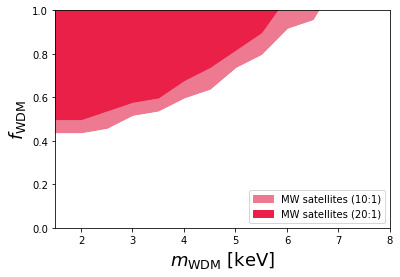

In [57]:
plt.plot(mass_10, limits_10,color='#ed7a91')
plt.fill_between(mass_10, limits_10,1,color='#ed7a91',label='MW satellites (10:1)')

plt.plot(mass_20, limits_20,color='#eb2049')
plt.fill_between(mass_20, limits_20,1,color='#eb2049',label='MW satellites (20:1)')

plt.xlim(1.5,8)
plt.ylim(0,1)
plt.xlabel("$m_{\mathrm{WDM}}$ [keV]",fontsize=18)
plt.ylabel("$f_{\mathrm{WDM}}$",fontsize=18)
plt.legend(loc='lower right')
plt.show()